In [ ]:
import pandas as pd


In [ ]:
dados = pd.read_csv('aluguel.csv', sep=';')

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [ ]:
list(dados['Tipo'].drop_duplicates()) # Para listar todas as coisas sem duplicata

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [ ]:
residencial = ['Quitinete',
'Casa',
'Apartamento',
'Casa de Condomínio',
'Casa de Vila']

In [ ]:
dados['Tipo'].isin(residencial).head(10) # Seleciona no DataFrame se os elementos da nossa lista existem de fato

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: Tipo, dtype: bool

In [ ]:
selecao = dados['Tipo'].isin(residencial)

In [ ]:
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [ ]:
dados_residencial = dados[selecao]

In [ ]:
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
list(dados_residencial['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [ ]:
dados_residencial.shape[0]

22580

In [ ]:
dados_residencial.index = range(dados_residencial.shape[0]) # Reconstruir o index

In [ ]:
dados_residencial.to_csv('aluguel_residencial.csv', sep=';', index = False)

In [ ]:
#Selecione somente os imóveis classificados com tipo 'Apartamento'.
selecao = dados ['Tipo'] == 'Apartamento'
selecao

0        False
1        False
2        False
3         True
4         True
         ...  
32955    False
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [ ]:
apartamento = dados_residencial[selecao]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
apartamento.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [ ]:
#Selecione somente os imóveis classificados com tipo 'Apartamento'.
selecao = dados['Tipo'] == 'Apartamento'
n1 = dados[selecao].shape[0]
n1

19532

In [ ]:
#Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')

In [ ]:
#Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
n2 = dados[selecao].shape[0]
n2

2212

In [ ]:
#Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
#60 <= Area <=100
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')
selecao = (dados['Area'] >= 60) & (dados['Area'] <= 100)
n3 = dados[selecao].shape[0]
n3

8719

In [ ]:
#Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.
selecao = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
n4 = dados[selecao].shape[0]
n4

41

In [ ]:
print("Nº de imóveis classificados com tipo 'Apartamento' -> {}".format(n1))
print("Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> {}".format(n2))
print("Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> {}".format(n3))
print("Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> {}".format(n4))

Nº de imóveis classificados com tipo 'Apartamento' -> 19532
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> 2212
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> 8719
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> 41


# Selecionando dados nulos

In [ ]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [ ]:
dados['Valor'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
22575    False
22576    False
22577    False
22578    False
22579    False
Name: Valor, Length: 22580, dtype: bool

In [ ]:
A = dados.shape[0]
dados.dropna(subset = ['Valor'])
B = dados.shape[0]
A - B

0

In [ ]:
A = dados.shape[0]
dados.dropna(subset = ['Valor'], inplace = True) # Para eliminar os faltantes
B = dados.shape[0]
A - B

9

In [ ]:
dados[dados['Condominio'].isnull()].shape[0]

1813

In [ ]:
selecao = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull()) # Para limpar apenas os apartamentos

In [ ]:
A = dados.shape[0]
dados = dados[~selecao] # Simbolo ~inverte a serie boleana
B = dados.shape[0]
A - B

745

In [ ]:
dados[dados['Condominio'].isnull()].shape[0] # Seleciona os dados nulos e mostra o numero

1068

In [ ]:
selecao = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull()) # Para selecionar as amostras com valor nulo
selecao.shape[0]

21826

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  20758 non-null  float64
 8   IPTU        15685 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [ ]:
dados.fillna(0, inplace = True) # Add zero a valores nulos outra forma de fazer dados = dados.fillna({'Condominio': 0, 'IPTU': 0})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


# Criando uma nova variavel na tabela


In [ ]:
dados.to_csv('aluguel_residencial.csv', sep = ';', index = False) # index False para não copiar o index

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


In [ ]:
#Criando uma nova variavel
dados['Valor Bruto'] = dados['Valor'] + dados['IPTU'] + dados['Condominio']

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0


In [ ]:
dados['Valor m2'] = dados['Valor']/dados['Area']

In [ ]:
dados['Valor m2'] = dados['Valor m2'].round(2) # Arredondar e mostras as duas ultimas casas depois da virgula

In [ ]:
dados['Valor Bruto m2'] = (dados['Valor Bruto']/dados['Area']).round(2)

In [ ]:
casa = ['Casa', 'Casa de Vila', 'Casa de Condomínio']

In [ ]:
casa

['Casa', 'Casa de Vila', 'Casa de Condomínio']

In [ ]:
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

In [ ]:
dados.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Casa
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartamento


In [ ]:
# Função Lambda = Nada mais são do que funções que o usuário não precisa definir, ou seja, não vai precisar escrever a função e depois utilizá-la dentro do código

# Excluindo Variaveis



In [ ]:
dados_aux = pd.DataFrame(dados[['Tipo Agregado', 'Valor m2', 'Valor Bruto', 'Valor Bruto m2']])

In [ ]:
dados_aux.head()

,Tipo Agregado,Valor m2,Valor Bruto,Valor Bruto m2
0,Apartamento,42.50,2260.0,56.50
1,Casa,70.00,7000.0,70.00
2,Apartamento,53.33,1210.0,80.67
3,Apartamento,16.67,1030.0,21.46
5,Apartamento,26.00,1618.0,32.36


In [ ]:
del dados_aux['Valor Bruto'] # Deletar algo

In [ ]:
dados_aux.pop('Valor Bruto m2')

0        56.50
1        70.00
2        80.67
3        21.46
5        32.36
         ...  
22575    20.54
22576    43.52
22577    33.85
22578    40.54
22579    53.71
Name: Valor Bruto m2, Length: 21826, dtype: float64

In [ ]:
dados_aux.head()

,Tipo Agregado,Valor m2
0,Apartamento,42.50
1,Casa,70.00
2,Apartamento,53.33
3,Apartamento,16.67
5,Apartamento,26.00


In [ ]:
dados.drop(['Valor Bruto', 'Valor Bruto m2'], axis = 1, inplace = True) # Add axis =1 se quero que exclua a coluna, axis = 0 linha

In [ ]:
dados.to_csv('aluguel_residencial.csv', sep = ';', index = False)

# Criando Agrupamentos

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [ ]:
dados_por_bairro = dados.groupby('Bairro')

In [ ]:
dados_por_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


In [ ]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [ ]:
dados['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
81           Flamengo
Name: Bairro, dtype: object

In [ ]:
grupo_bairro = dados.groupby('Bairro')

In [ ]:
for bairro, data in grupo_bairro:
    print(bairro)


Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [ ]:

for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, dados.Valor.mean()))

Barra da Tijuca -> 6432.60027832351
Botafogo -> 6432.60027832351
Copacabana -> 6432.60027832351
Flamengo -> 6432.60027832351
Ipanema -> 6432.60027832351
Leblon -> 6432.60027832351
Tijuca -> 6432.60027832351


In [ ]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [ ]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


# Estatistica Descritiva

In [ ]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [ ]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [ ]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', 'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

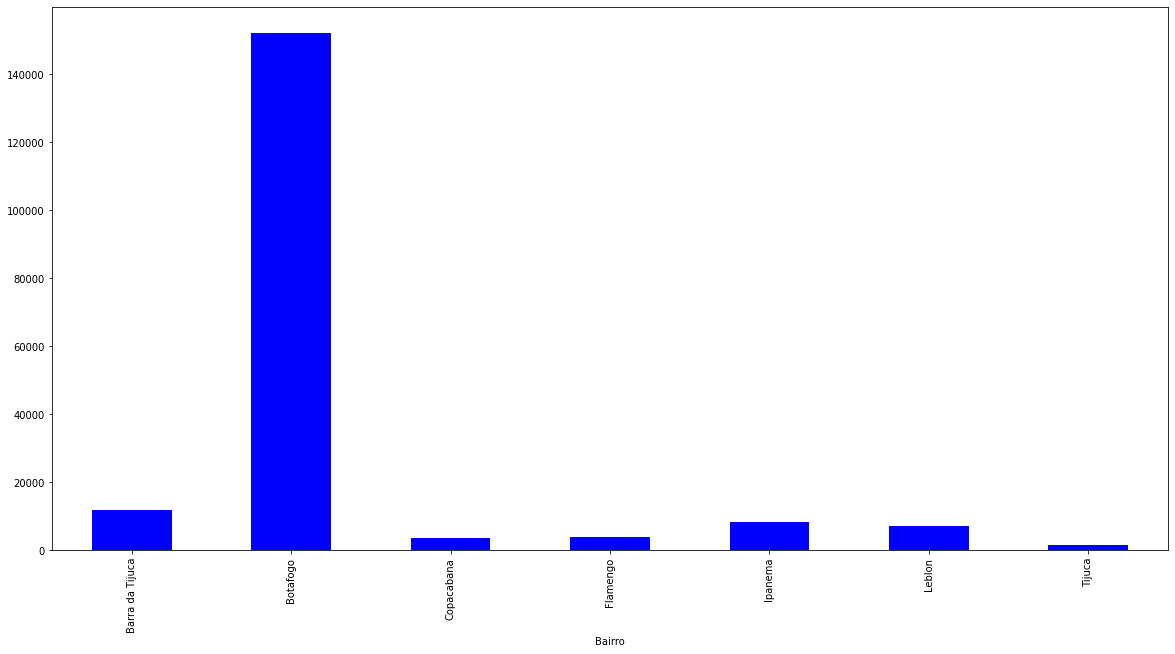

In [ ]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

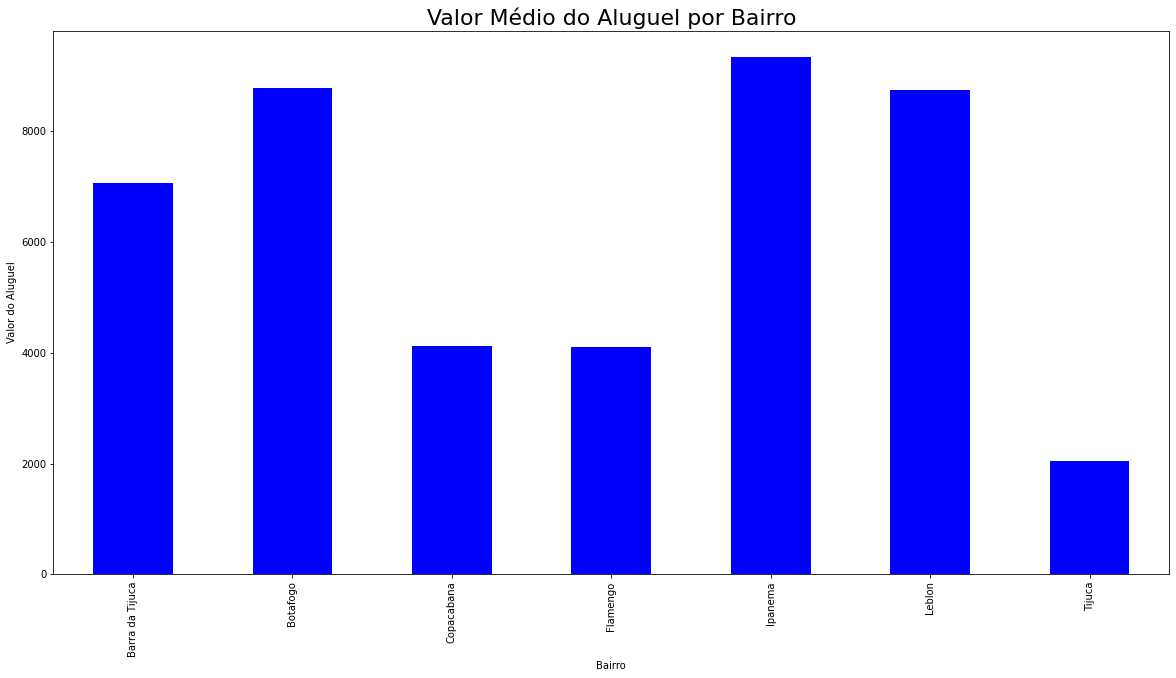

In [ ]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

# Identificando e Removendo Outliers

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [ ]:
dados= pd.read_csv('aluguel_residencial.csv', sep = ';')

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


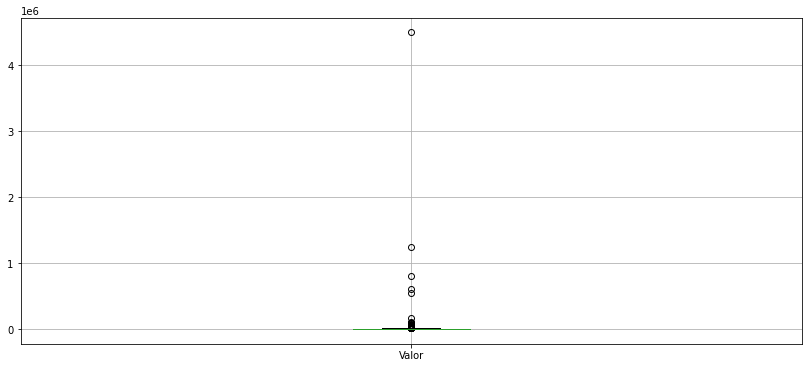

In [ ]:
dados.boxplot(['Valor'])

In [ ]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [ ]:
valor = dados['Valor']

In [ ]:
Q1 = valor.quantile(.25) # Calcular Q1

In [ ]:
## Dados do Box Plot
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
Q1

1600.0

In [ ]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

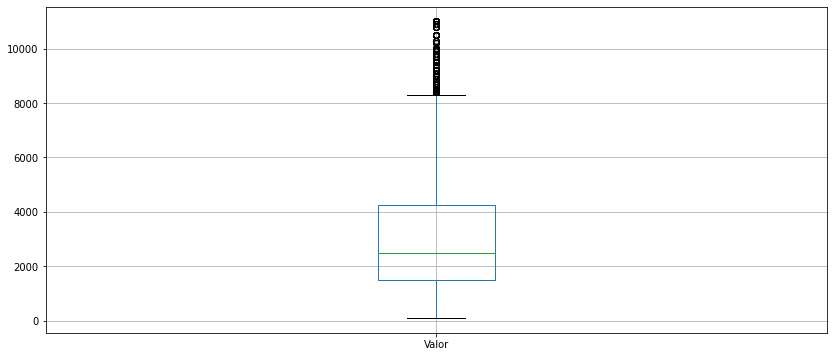

In [ ]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f060a5774d0>]],
      dtype=object)

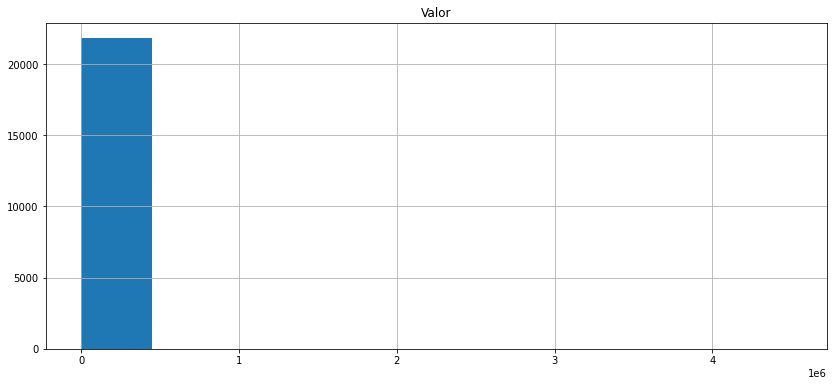

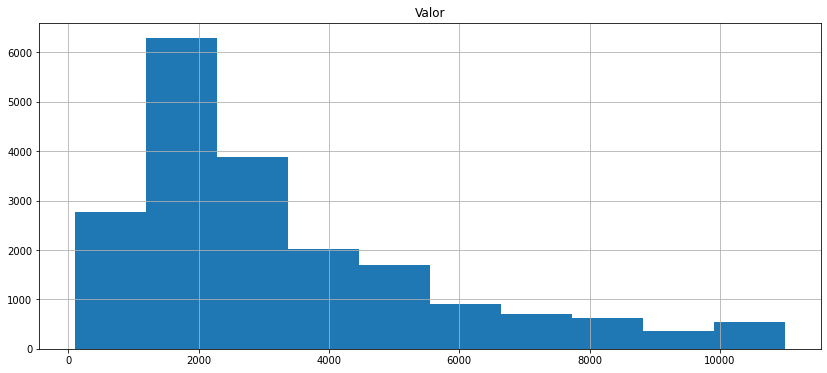

In [ ]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

In [ ]:
amostra = pd.read_csv('aluguel_amostra.csv', sep =';')

In [ ]:
amostra.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [ ]:
Q1 = amostra['Valor m2'].quantile(.25)
Q3 = amostra['Valor m2'].quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
print(Q1,Q3,IIQ,limite_inferior,limite_superior)

21.25 42.31 21.060000000000002 -10.340000000000003 73.9


In [ ]:
#DESAGRUPAR OS DADOS E FAZER UM AGRUPAMENTO POR GRUPOS

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


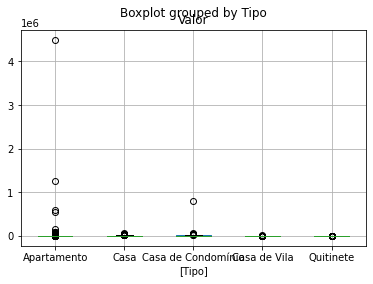

In [ ]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [ ]:
grupo_tipo = dados.groupby('Tipo')

In [ ]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [ ]:
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [ ]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [ ]:
limite_superior['Apartamento']

9950.0

In [ ]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [ ]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [ ]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


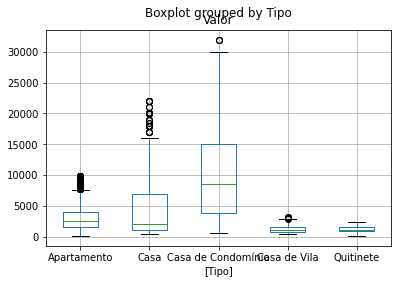

In [ ]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)